# A - Les expressions régulières 
## Général regex
Comme dans tout domaine de machine learning, les données doivent être preprocess pour pouvoir convenir à l'algorithme. En traitement de texte, une partie de ce preprocess a pour but d'identifier ce qu'on appelle les expressions régulières. Une expression régulière, aussi appelée regex, est une chaine de caractères qui décrit, selon une syntaxe précise, un ensemble de chaines de caractères possibles. Pour repérer ces regex, on utilise sur python la librairie re. Pour ce faire, on décrit le pattern que respecte la chaine de caractères à identifier et on utilise les fonctions de la librairie. Plus en détail, on a:

- Compiler en créant un élément. Ex: r = re.compile(r"a") va chercher les a dans le texte.
- Chercher à l'aide d'une des trois méthodes : findall(), search() ou match().   

Chacune à sa spécificité. On y reviendra plus tard. Pour l'instant, utilisons **findall()**.

In [1]:
import re  # librairie pour trouver les regex ( expressions régulières )

- Attribuer à v un RE qui détecte les nous.
- Attribuer à txt la phrase A la maison, nous avons une télévision. Nous sommes heureux.


In [2]:
txt = 'A la maison, nous avons une télévision. Nous sommes donc heureux'

v = re.compile(r"nous") # r = recherche "nous"
pointeur = v.findall(txt)
print(pointeur)

['nous']


In [3]:
t = re.compile(r"a") # recherche "a" mais pas les "A"
pointeur = t.findall(txt)
print(pointeur)   

['a', 'a', 'a']


On note deux choses. La première est que la librairie fait la différence entre les majuscules et les minuscules. La seconde est que cela est très vite limité si nous devons taper à la main tout ce que RE doit trouver.   

- Pour cela, nous allons utiliser une syntaxe particulière. \ Pour ce faire, nous utilisons la syntaxe suivante dans notre élément re: [pattern de la regex]

Créons par exemple un RE capable de détecter toutes les lettres en majuscule. Pour se faire :

- r = re.compile(r"[A-Z]") permet de détecter toutes les majuscules.  

Utiliser findall() sur la variable txt précédente pour repérer ce qu'elle détecte.

In [4]:
r = re.compile(r"[A-Z]")
pointeur = r.findall(txt)
print(pointeur)

print(re.findall(r"[A-Z]",txt))

['A', 'N']
['A', 'N']


Il existe de nombreux schémas différents. En voici quelques-uns :

- [a-zA-Z0-9] détecte l'ensemble des lettres majuscules ou minuscules et les chiffres
- [abc145] détecte les caractères a, b, c, 1,4 ou 5.  

On peut aussi intégrer des caractères spéciaux, mais pour cela on doit les introduire avec un '\', comme par exemple

- [a-zA-Z0-9\.\?] détecte, en plus des lettres et chiffres, les '.' et les '?'.  

Il existe des raccourcis pour pouvoir identifier plus précisemment ce que nous voulons, comme :

- [^A-Z] détecte TOUT à l'exception des lettres majuscules.
- tion$ détecte les tion en fin de chaine, i.e fin de string ou avant un renvoie à la ligne.
- ^je détecte les chaines de caractères commençant par je (comme jeux, jeudi...).

Pour les patterns de 1 à 5,  ( pattern = motif )

Deviner les sorties sur la variable txt.
Compiler chaque pattern et regarder le résultat. Aviez-vous bien prédit ?

In [5]:
txt = 'A a - § é 8 1 . Potion'

print("Pour txt, [a-zA-Z0-9] détecte ", re.findall(r"[a-zA-Z0-9]",txt))

print("Pour txt, [abc145] détecte ", re.findall(r"[abc145]",txt))

print("Pour txt, [a-zA-Z0-9\.\?]  détecte ", re.findall(r"[a-zA-Z0-9\.\-]",txt))

print("Pour txt, [^A-Z] détecte ", re.findall(r"[^A-Z]",txt))

print("Pour txt, tion$ détecte ", re.findall(r"tion$",txt))

Pour txt, [a-zA-Z0-9] détecte  ['A', 'a', '8', '1', 'P', 'o', 't', 'i', 'o', 'n']
Pour txt, [abc145] détecte  ['a', '1']
Pour txt, [a-zA-Z0-9\.\?]  détecte  ['A', 'a', '-', '8', '1', '.', 'P', 'o', 't', 'i', 'o', 'n']
Pour txt, [^A-Z] détecte  [' ', 'a', ' ', '-', ' ', '§', ' ', 'é', ' ', '8', ' ', '1', ' ', '.', ' ', 'o', 't', 'i', 'o', 'n']
Pour txt, tion$ détecte  ['tion']


In [6]:
txt = 'A a - § é 8 1 attraction. Potir'
re.findall(r"tion$",txt)  # ne trouve rien car tion n'est pas en fin de str !

[]

Maintenant qu'on comprend comment on **trouve des patterns**, il faut comprendre comment on **repère les regex**, formés par des mots, des expressions... Et pour cela, on se sert de quantifieurs.

-  " * " permet de détecter si une expression est présente 0, 1 ou plusieurs fois.\ Exemple : "cha*t" détecte cht, chat, chaat, chaaat,...

- '+' permet de détecter si une expression est présente 1 ou plusieurs fois.\ Exemple : "cha+t" détecte chat, chaat, chaaat,...

- ? permet de détecter si une expression est présente 0 ou 1 fois.\ Exemple : "cha?t" détecte cht ou chat.

- {n} permet de détecter la répétition d'un nombre exacte d'une expression.\ Exemple : "cha{2}t" détecte chaat.

- {n,} permet de détecter la répétition d'une expression au moins n fois.\ Exemple : "cha{2,}t" détecte chaat, chaaat,...

- {n,m} permet de détecter la répétition d'une expression au moins n fois mais au plus m fois.\ Exemple : "cha{2,4}t" détecte chaat, chaaat ou chaaaat.

- Note : *= {0,}, += {1,} et ? = {0,1}.

Compiler un RE capable de détecter les nombres de txt.

In [7]:
txt = "J'habite au 137 bd Auguste Blanqui, au 12ème étage"

#Détection de nombres et de chiffres
r = re.compile("[0-9]+")
nombres = r.findall(txt)
print("nombres détectés ",nombres)


nombres détectés  ['137', '12']


In [8]:
txt = "J'habite au 137 bd Auguste Blanqui, au 12ème étage"

#détection de nombres et de chiffres
r = re.compile("[0-9]*") 
nombres = r.findall(txt)
print("nombres détectés ",nombres)

nombres détectés  ['', '', '', '', '', '', '', '', '', '', '', '', '137', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '12', '', '', '', '', '', '', '', '', '', '']


### ne pas confondre * et +

In [9]:
#détection de nombre d'au moins 3 chiffres
r = re.compile("[0-9]{3,}") 
nombres = r.findall(txt)
print("nombres d'au moins 3 chiffres détectés :",nombres)


nombres d'au moins 3 chiffres détectés : ['137']


Il existe des raccourcis qui permettent d'appeler les regex les plus utilisées :

- \d = [0-9] et \D = [^0-9].
- \w = [a-zA-Z0-9_] et \W = [^a-zA-Z0-9_].
- \t = une tabulation et \n un saut à la ligne.
- \s = ' ' (ie un espace) et \S = [^' '].  

Identifier les adverbes en -ment en utilisant les raccourcis.

In [10]:
txt = "Apparemment, Philippe n'est chez lui. Mais, étonnamment, il n'est pas en chemin non plus. Il roule vers une autre destination"

r = re.compile(r"\w+ment")
print(r.findall(txt))

['Apparemment', 'étonnamment']


- Identifier un pattern aux adresses mails valident ci-dessous.
- Compiler un RE capable de les détecter.
- Afficher les sorties pour vérifier.

In [11]:
txt = 'Georges98@yahoo.com \n coucou.com \n grégoire.richon@apple.com\n constitution@justice \n sarkozy@élysée.fr'

r = re.compile(r"[A-Za-z0-9\.\?éà]+@[a-zA-Zéà]+\.[a-z]{2,4}")
print(r.findall(txt))

['Georges98@yahoo.com', 'grégoire.richon@apple.com', 'sarkozy@élysée.fr']


Il existe aussi des **métacaractères**. Ce sont des caractères qui ont une fonctionnalité particulière. Comme vu plus haut, il y a $ (fin d'un string), [ ou ] qui servent à encadrer des champs de caractères, ^ qui sert à capter soit le début d'un string ou être le contraire d'un champs de caractères, en fonction de sa position. Il y a aussi :

- . qui fait référence à n'importe quel caractère.
- | qui joue un ou inclusif.
- ( et ) qui servent à créer des groupes comme on le verra plus bas.

et bien d'autres encore. 

**Pour faire appel à ces caractères, et non leur fonctionnalité, on les précède d'un \.**

Exemple : ^(De|A):@ détermine De:@ ou A:@ en début de phrase tandis que \^(De\|A\):@ trouve littérallement ^(De|A):@.

Trouver les liens html dans la variable txt. Attention à bien faire attention aux détails des liens.

In [12]:
txt = 'https://www.google.com/ \n http://www.safari.fr/data-science'

r = re.compile(r"https?://[A-Za-z0-9\.\-/]+")
print(r.findall(txt))

['https://www.google.com/', 'http://www.safari.fr/data-science']


## Search vs Match vs Findall vs Finditer
Avant de parler des différences entre ces fonctions, discutons de l'outil qui permet de former des groupes et sous-groupes, qu'on appelle avec (pattern à identifier). Il permet de vérifier la présence d'un pattern particulier.

**Attention** : (ab) va détecter la présence du pattern ab tandis que [ab] recherche les lettres a et b.

Comme avec [...], on peut utiliser les quantifieurs pour les groupes.

Exemple : (ab)+ va détecter ab, abab, ababab,...

Reprenons l'exemple précédent en insérant le sous-groupe pour détecter la différence entre les deux liens, qui se trouvent au niveau du http et https. Ainsi, on aimerait détecter le groupe s.

Modifier le compilateur précédent en notant r = re.compile(r"http(s)?://[a-zA-z0-9\.\-/]+") et regarder le résultat.

In [13]:
r = re.compile(r"http(s)?://[a-zA-z0-9\.\-/]+")
liens = r.findall(txt)
print(liens)

['s', '']


Ici, findall ne détecte pas la même chose.

Il y a 4 outils pour chercher des patterns:

- match() détermine si la RE correspond dès le début de la **chaîne**.
- search() analyse la **chaîne** à la recherche d'une position où la RE correspond.
- finditer() trouve toutes les **sous-chaînes** qui correspondent à la RE et les renvoie sous la forme d'un itérateur.
- findall() trouve toutes les **sous-chaînes** qui correspondent à la RE et les renvoie sous la forme d'une liste.  

A partir du moment où on instaure des groupes, findall() va détecter les sous-groupes, ici s. Nous allons donc nous intéresser à search() qui semble plus adapté. search() est ce qu'on appelle un Match object et renvoie les éléments qui nous intéressent sous forme de groupes. Les groupes sont numérotés à partir de 0. Le groupe 0 est toujours présent ; c'est l'ensemble de la RE, donc les méthodes de l'objet correspondant ont le groupe 0 comme argument par défaut. Pour faire appel aux sous-groupes, on utilise l'extension groups().

- Exécuter la cellule ci-dessous et analyser ses sorties.

In [34]:
r = re.compile('(a(b)c)d')
g = r.match('abcd')
print("group(0) = ",g.group(0),"groups() =", g.groups(), "group() =", g.group())

group(0) =  abcd groups() = ('abc', 'b') group() = abcd


In [32]:
g.group(2)

'b'

Si jamais il n'y a pas le groupe en entier, i.e abcd, alors ce sera une variable type ( NoneType ). Par contre, une fois le groupe identifié, match() ou search() va détecter la présence ou non de sous-groupes.

Pour utiliser search(), on va :

- Instancier le compilateur r = re.compile(r"http(s)?://[a-zA-z0-9\.\-/]+").
- **liens.group()** pour afficher la première correspondance.
- **liens.groups()** pour afficher les sous-chaines détectées.

In [33]:
txt = 'https://www.google.com/ \n http://www.safari.fr/data-science'
r = re.compile(r"http(s)?://[a-zA-z0-9\.\-/]+")
liens = r.search(txt)
print(liens.group(), liens.groups())

https://www.google.com/ ('s',)


Ici search() ne renvoie que le premier lien. C'est normal puisque search() ne renvoie que la première correspondance trouvée. C'est pour cela qu'il faut faire attention à la subtilité des groupes et sous-groupes qui peuvent provoquer des erreurs.

- Exécuter la cellule ci-dessous. Elle permet d'importer sous forme de string un extrait du code html d'une page web.

In [16]:
data = 'Line 13:<a href="mailto:mwolf@mg-cc.org" target="_self" title="Click to send an Email">gdalonzo@mg-cc.org</a> \nLine 28:<a href="mailto:bfritz@mg-cc.org" target="_self" title="Click to send an Email">bfritz@mg-cc.org</a> \nLine 43:<a href="mailto:alazovitz@mg-cc.org" target="_self" title="Click to send an Email">alazovitz@mg-cc.org</a> \nLine 58:<a href="mailto:cboyenga@mg-cc.org" target="_self" title="Click to send an Email">cboyenga@mg-cc.org</a> \nLine 73:<a href="mailto:bdoheny@mg-cc.org" target="_self" title="Click to send an Email">bdoheny@mg-cc.org</a> \nLine 88:<a href="mailto:mwolf@mg-cc.org" target="_self" title="Click to send an Email">mwolf@mg-cc.org</a> \nLine 104:<a href="mailto:cgiampa@mg-cc.org" target="_self" title="Click to send an Email">cgiampa@mg-cc.org</a> \nLine 122:<a href="mailto:DiningManager@mg-cc.org" target="_self" title="Click to send an Email">DiningManager@mg-cc.org</a> \nLine 142:<a href="mailto:freycc@npenn.org" target="_self" title="Click to send an Email">freycc@npenn.org</a> \nLine 164:<a href="mailto:selmairobinson@gmail.com" target="_self" title="Click to send an Email">selmairobinson@gmail.com</a> \nLine 184:<a href="mailto:sfalatek@mg-cc.org" target="_self" title="Click to send an Email">sfalatek@mg-cc.org</a> \nLine 206:<a href="mailto:kmurphy@mg-cc.org" target="_self" title="Click to send an Email">kmurphy@mg-cc.org</a> \nLine 27:<a href="tel:+12158863033" target="_self" title="Click to make a Call">(215) 886-3033</a><br> \nLine 72:<a href="tel:+12672413239" target="_self" title="Click to make a Call">(267) 241-3239</a><br> \nLine 163:<a href="tel:+12153612926" target="_self" title="Click to make a Call">(215) 361-2926</a><br>'

print(data)

Line 13:<a href="mailto:mwolf@mg-cc.org" target="_self" title="Click to send an Email">gdalonzo@mg-cc.org</a> 
Line 28:<a href="mailto:bfritz@mg-cc.org" target="_self" title="Click to send an Email">bfritz@mg-cc.org</a> 
Line 43:<a href="mailto:alazovitz@mg-cc.org" target="_self" title="Click to send an Email">alazovitz@mg-cc.org</a> 
Line 58:<a href="mailto:cboyenga@mg-cc.org" target="_self" title="Click to send an Email">cboyenga@mg-cc.org</a> 
Line 73:<a href="mailto:bdoheny@mg-cc.org" target="_self" title="Click to send an Email">bdoheny@mg-cc.org</a> 
Line 88:<a href="mailto:mwolf@mg-cc.org" target="_self" title="Click to send an Email">mwolf@mg-cc.org</a> 
Line 104:<a href="mailto:cgiampa@mg-cc.org" target="_self" title="Click to send an Email">cgiampa@mg-cc.org</a> 
Line 122:<a href="mailto:DiningManager@mg-cc.org" target="_self" title="Click to send an Email">DiningManager@mg-cc.org</a> 
Line 142:<a href="mailto:freycc@npenn.org" target="_self" title="Click to send an Email">fr

On observe en fin de code, que les adresses mails apparaissent en double (exemple tiré du code html: \ bfritz@mg-cc.org\). Il faut donc essayer d'identifier un pattern particulier, pour repérer les adresses mails et éviter de les avoir en double.

Note : pour mieux identifier le pattern, un **ctrl+f** permet de trouver ce que vous voulez rapidement.

- Détecter les mails présents dans le code html.

In [17]:
#compilation de RE
r = re.compile(r">([a-zA-Z0-9.-]+@[a-zA-Z.-]+)<") 

#trouver les emails
email = r.findall(data)
print(email)

['gdalonzo@mg-cc.org', 'bfritz@mg-cc.org', 'alazovitz@mg-cc.org', 'cboyenga@mg-cc.org', 'bdoheny@mg-cc.org', 'mwolf@mg-cc.org', 'cgiampa@mg-cc.org', 'DiningManager@mg-cc.org', 'freycc@npenn.org', 'selmairobinson@gmail.com', 'sfalatek@mg-cc.org', 'kmurphy@mg-cc.org']


- Identifier les numéros de téléphone dans le code html.

In [18]:
#Compilation de RE
r = re.compile(r"\([0-9]{3}\)\s[0-9]{3}-[0-9]{4}")

#Trouver les numéros
phones = r.findall(data)
print(phones) 

['(215) 886-3033', '(267) 241-3239', '(215) 361-2926']


## SPLIT & SUB
La fonction split() découpe en suivant les correspondances de l'expression régulière.

On va essayer de séparer une phrase en fonction des mots, c'est-à-dire que dès qu'il n'y a pas de lettres ou de chiffres, on sépare, ie [^a-zA-Z0-9_] = \W.

- Exécuter la cellule ci-dessous pour comprendre comment cela fonctionne.

In [19]:
#Compilateur
r = re.compile(r"\W+")

#Exemple
txt = "L'exemple... parfait pour comprendre"

#Split
print(r.split(txt))

['L', 'exemple', 'parfait', 'pour', 'comprendre']


Séparer la phrase suivante, mais cette fois-ci en conservant les apostrophes.
- Exemple : Pour la phrase 'L'exemple ... parfait pour comprendre', il nous renvoie [L'exemple, parfait, pour, comprendre].

In [20]:
#compilateur
r = re.compile(r"[^A-Za-z0-9_']+")

#split
print(r.split(txt))

["L'exemple", 'parfait', 'pour', 'comprendre']


Si des parenthèses de capture sont utilisées dans la RE, leur contenu est également renvoyé dans la liste résultante.

- Exécuter la cellule suivante où la seule différence se trouve au niveau des parenthèses entre \W+.

In [21]:
r = re.compile(r"(\W+)")
print(r.split(txt))

['L', "'", 'exemple', '... ', 'parfait', ' ', 'pour', ' ', 'comprendre']


Sub permet de remplacer une occurrence par un autre terme. Pour cela :

- 1. On crée un RE capable de détecter le terme que l'on souhaite changer.
- 2. On utilise la commande sub(nouveau terme, texte à modifier). 

Exécuter la cellule pour voir les changements opérés.

In [22]:
#compilateur
r = re.compile(r"super")

txt = "c'est super cool comme superstition"

print(r.sub('cool', txt))

c'est cool cool comme coolstition


Il faut néanmoins faire **attention aux chevauchements entre les mots** comme le montre l'exemple ci-dessus.   
La balise \b...\b permet d'indiquer que l'on cherche uniquement ce pattern, et non pas ce pattern possiblement imbriqué dans un autre mot.

- Relancer le compilateur adapté pour qu'il ne remplace que les mots "super".

In [23]:
r = re.compile(r"\bsuper\b")
print(r.sub('cool', txt))

c'est cool cool comme superstition


- Faire appel au jeu de données tweets_macron.txt et afficher les 3 premières lignes. Note : sep = \t.

In [13]:
import pandas as pd

# lire le fichier
df = pd.read_csv("tweets_macron.txt", sep = '\t')

#afficher les 3 premieres lignes
df.head(3)

,text
0,#SiJétaisPrésident se serait la fin du monde.....
1,#SiJétaisPrésident je donnerai plus de vacance...
2,Affaire #Alstom #Macron c'est de la #haute-tra...


- Remplacer les hastags par <hastag>.
- Remplacer les liens internet par <lien>.

In [35]:
textes = df["text"]

#compilateur
r = re.compile(r" #\w+ ")
textes = r.sub("<hashtag>", str(textes))

#compilateur liens internet
r = re.compile(r"https?://[A-Za-z0-9./]+")
textes = r.sub("<lien>", textes)

In [36]:
textes  # textes est un str !! pas la serie de départ!!

'0     <hashtag>se serait la fin du monde.....\n1     <hashtag>je donnerai plus de vacance...\n2      Affaire<hashtag>#Macron c\'est de la #haute-tra...\n3      Excellent billet de @vtremolet qui démonte, 1 ...\n4      Sondage, au premier tour<hashtag>met<hashtag>...\n                             ...                        \n175    Présidentielle 2017. Sondage:<hashtag>(18,5%) ...\n176    @orja8 @gerardfiloche @petiterevue2web\\néconom...\n177    Cars<hashtag>: les tarifs commencent à augment...\n178    EDITO - Manuel Valls compte bien mettre #Macro...\n179   <hashtag>en privé : "Emmanuel<hashtag>peut détru...\nName: text, Length: 180, dtype: object'

In [37]:
type(textes)

str

## Greedy vs Lazy
Maintenant que vous avez appris les bases, il faut faire attention au mode de fonctionnement des quantifieurs. Il faut distinguer les quantifieurs greedy des lazy.

Greedy	 -----   Lazy	  ----   Description
- 'étoile'	---- *?	----  0, 1 ou plus
- 'plus'	 ---- +? ----	au moins 1
- ?	---- ?? ----	0, 1
- {n}	----{n}? ----	n fois exactement
- {n,} ----	{n,}? ----	n fois au moins
- {,m} ----	{,m}? ----	m fois au plus
- {n,m}	---- {n,m}?	---- entre n et m fois  

   -  les greedy vont essayer de capter le plus grand pattern possible tandis que les lazy vont essayer de capturer le plus petit. Autrement dit, le greedy va continuer de chercher tant que la condition est satisfaite alors que le lazy va s'arrêter une fois la condition plus satisfaite.

   - Par exemple sur l'exemple ci dessous de stackoverflow, on cherche à identifier un pattern commençant par s et finissant par o avec n'importe quel caractère entre les deux.

   - Greedy : associer à r1 le compilateur suivant : re.findall(r"s.*o", 'stackoverflow').
   - Lazy : associer à r2 le compilateur suivant : re.findall(r"s.*?o", 'stackoverflow').
- Observer la différence des deux résultats.

In [40]:
r1 = re.findall(r"s.*o", 'stackoverflow')
r2 = re.findall(r"s.*?o", 'stackoverflow')
print(r1)
print(r2)

['stackoverflo']
['stacko']


Le greedy va, une fois le s identifié, aller à la fin du string et remonter caractère par caractère jusqu'à trouver un o. Pour le lazy, une fois le s identifié, il va avancer de caractère en caractère en respectant la condition . (ie n'importe quel caractère) jusqu'à trouver un o.

- Identifier chaque balise de la variable txt.

In [21]:
txt = '<html><head><title>Title<\title>'

#compilation
r = re.compile(r"<.*?>")

#balises
balise = r.findall(txt)
print("les balises identifiées par l'opérateur lazy sont :", balise)

les balises identifiées par l'opérateur lazy sont : ['<html>', '<head>', '<title>', '<\title>']


**ATTENTION** car si nous prenons l'équivalent greedy , nous avons :

In [22]:
print("les balises identifiées par l'opérateur greedy sont :", re.findall(r"<.*>", txt))

les balises identifiées par l'opérateur greedy sont : ['<html><head><title>Title<\title>']


Ce qui est normal car il va détecter le premier < correspondant à celui de html. A partir de là, il va à la fin du string. A ce moment, il identifie la dernière > correspondant à la balise \title. Entre ces deux balises, il n'y a que des caractères tolérés par la condition '.'. Ainsi, il va prendre l'ensemble du lien html.

## Verbose
re.verbose est un outil intéressant qui peut vous aider à commenter les patterns à l'aide de #, dans l'optique d'être plus compréhensible et lisible. Par exemple, pour identifier les liens html, on passe de re.compile(r"https?://[A-Za-z0-9\.\-/]+"), qui est illisible, à


   re.compile(r"""

       https?                       #identifie http ou https

       ://                          #commun à tous les liens

       [A-Za-z0-9.-/]+            #suite du lien 

""", re.VERBOSE)
- Détecter les adresses mails suivantes en présentant de manière aérée, lisible et commentée.

In [23]:
txt = 'g.petoit93@gmail.com oliver.small459@orange.fr \n m.lameinère@yahoo.fr'

r = re.compile(r"""[A-Za-z0-9\.-éà]+  #n'importe quelle suite de caractères au moins 1 fois
                    @                 #le caractère @
                    [a-zA-Z\.-]+      #la suite de caractères après le @
                    """, re.VERBOSE)

email = r.findall(txt)
print(email)

['g.petoit93@gmail.com', 'oliver.small459@orange.fr', 'm.lameinère@yahoo.fr']


# B - Prétraitement 


Après avoir saisi les expressions régulières, l'objectif de cet exercice est de présenter les outils fondamentaux du text mining, avec notamment : 
- la tokenisation, 
- la technique Bag of words, 
- le filtrage Stop words, 
- la racinisation et 
- la lemmatisation.    

Ce sont des techniques très utilisées pour les travaux préliminaires nécessaires à toute analyse se basant sur des données de type texte.

## La tokenization
La tokenization est une tâche très courante en linguistique, celle-ci consiste à segmenter des textes en unités plus petites. Par exemple une phrase est "tokenizée" en mots ou un paragraphe est tokenizé en phrase. Le découpage le plus courant est celui dans lequel les unités de base sont des tokens (mots, chiffres ou ponctuations) et pour un même texte il existe plusieurs tokenizations possibles.

Une tokenisation possible de la phrase suivante :    
"La science des données est l'extraction de connaissances." sera alors : ['la', 'science', 'des', 'données', 'est', 'l'extraction', 'de', 'connaissances'].

Le package **Scikit-learn** et la boîte-à-outil : **Natural Language Toolkit (NLTK)** sont deux bibliothèques qui vont permettre de créer des programmes pour l'analyse de texte.

Assigner à la variable txt le célèbre couplet de Molière suivant :
"Souffrez qu'Amour cette nuit vous réveille. Par mes soupirs laissez-vous enflammer. Vous dormez trop, adorable merveille. Car c'est dormir que de ne point aimer."

Importer la classe **PunktSentenceTokenizer** du package nltk.tokenize.

Initialiser **tokenizer**, une instance de la classe PunktSentenceTokenizer.

À l'aide de la méthode tokenize de l'objet tokenizer, découper txt en tokens. .

Rappelez-vous qu'avant de regarder la solution, vous avez toujours accès à l'aide officielle de Python en tapant help(nom_fonction) dans la console.

In [1]:
# Initialiser les données textes
txt = "Souffrez qu'Amour cette nuit vous réveille. Par mes soupirs laissez-vous enflammer. \
Vous dormez trop, adorable merveille. Car c'est dormir que de ne point aimer."

# Appliquer la tokenisation
from nltk.tokenize import PunktSentenceTokenizer 
tokenizer = PunktSentenceTokenizer()
tokenizer.tokenize(txt)

["Souffrez qu'Amour cette nuit vous réveille.",
 'Par mes soupirs laissez-vous enflammer.',
 'Vous dormez trop, adorable merveille.',
 "Car c'est dormir que de ne point aimer."]

La technique de tokenisation implémentée ci-dessus, consiste à découper un paragraphe en plusieurs phrases.   
Selon les situations il peut être également intéressant de découper les phrases en mots. Le sous package nltk.tokenize implémente la fonction word_tokenize permettant d'effectuer le découpage des données textes en mots.

- Importer la fonction word_tokenize du sous package nltk.tokenize.
- Appliquer la méthode word_tokenize à la phrase : txt, en précisant que le langage utilisé est le français (french).
- Stocker les tokens dans la variable mots.   

La méthode word_tokenize s'utilise comme suit : mots = word_tokenize(phrase, language = 'french'). Elle permet de découper le paragraphe txt en une liste de mots.

In [2]:
# Découper la phrase en mots
from nltk.tokenize import word_tokenize
mots = word_tokenize(txt, language='french')
print(mots)

['Souffrez', "qu'Amour", 'cette', 'nuit', 'vous', 'réveille', '.', 'Par', 'mes', 'soupirs', 'laissez-vous', 'enflammer', '.', 'Vous', 'dormez', 'trop', ',', 'adorable', 'merveille', '.', 'Car', "c'est", 'dormir', 'que', 'de', 'ne', 'point', 'aimer', '.']


## Le filtrage Stop Words
Après avoir découpé la phrase en mots, nous pouvons remarquer que la variable mots contient des mots dont certains sont très fréquemment rencontrés, il s'agit de "mots vides".   

Un mot vide (ou stop word, en anglais) est un mot qui est tellement commun qu'il est inutile de l'indexer ou de l'utiliser dans une recherche.   

En français, des mots vides évidents pourraient être : "le", "la", "de", "du", "ce", ...

La librairie NLTK contient quelques mots vides, pour les connaître :

Exécuter la cellule de code ci-dessous.

In [4]:
# Importer stopwords de la classe nltk.corpus
from nltk.corpus import stopwords

# Initialiser la variable des mots vides
stop_words = set(stopwords.words('french'))
print(stop_words)

{'sur', 'étais', 'aie', 'te', 'eussent', 'eux', 'par', 'aura', 'pour', 'ma', 'été', 'ait', 'ce', 'fût', 'ont', 'votre', 'sa', 'dans', 'serons', 'fussent', 'auraient', 't', 'moi', 'fussions', 'furent', 'pas', 'seras', 'étions', 'le', 'ai', 'suis', 'qui', 'avec', 'sont', 'avaient', 'eûmes', 'j', 'toi', 'fûmes', 'aurai', 'étés', 'avions', 'aux', 'auriez', 'eus', 'sois', 'eues', 'étiez', 'eue', 'en', 'étant', 'auront', 'mon', 'fussiez', 'y', 'avait', 'les', 'ton', 'ils', 'sommes', 'serai', 'fus', 'de', 'ne', 'ta', 'c', 'qu', 'un', 'aurais', 'eussions', 'fusse', 'du', 'eusses', 'ayantes', 'étante', 'et', 'es', 'eusse', 'serez', 'il', 'nous', 'aurons', 'seriez', 'm', 'avais', 'elle', 'aient', 'étées', 'as', 'mes', 'eurent', 's', 'n', 'êtes', 'lui', 'nos', 'mais', 'aurez', 'vous', 'ayons', 'son', 'ces', 'notre', 'une', 'étants', 'la', 'serait', 'avez', 'eu', 'soyons', 'l', 'ou', 'étantes', 'fusses', 'eussiez', 'soyez', 'était', 'étaient', 'ayez', 'à', 'eûtes', 'auras', 'soit', 'aurait', 'que'

La variable stop_words est de **type set**. Il est possible d'ajouter un mot vide au set stop_words en exécutant la commande suivante : stop_words.add("mot_vide").

Et pour ajouter plusieurs mots vides en utilisant la méthode update comme suit : stop_words.update([word1, word2]).

- Ajouter au set stop_words les deux mots vides suivants : "." et ",".
- Définir la fonction stop_words_filtering qui permet de supprimer les mots vides d'une liste passée en paramètre.
- Mettre à jour la liste mots en supprimant les mots vides du set stop_words.

In [5]:
# ajouter les mots vides : "." et ","
stop_words.update([",", "."])

# définir la fonction stop_words_filtering
def stop_words_filtering(mots) : 
    tokens = []
    for mot in mots:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens


#ou 
#def stop_words_filtering(mots) : 
#    tokens = [mot for mot in mots if mot not in stop_words]
#     return tokens   


# Appliquer la fonction stop_words_filtering à la variable mots
print(stop_words_filtering(mots))

['Souffrez', "qu'Amour", 'cette', 'nuit', 'réveille', 'Par', 'soupirs', 'laissez-vous', 'enflammer', 'Vous', 'dormez', 'trop', 'adorable', 'merveille', 'Car', "c'est", 'dormir', 'point', 'aimer']


Les mots vides ne sont plus présents dans le corpus : "vous", "mes", "que", "de", "ne", "," et ".".    
Cependant, nous pouvons toujours remarquer que les tokens contiennent toujours des mots composés : "laissez-vous" et "c'est".    
Ainsi, la bibliothèque NLTK offre la possibilité de découper un corpus en gardant que des tokens particuliers par le biais des expressions régulières.

- Importer la classe RegexpTokenizer du package nltk.tokenize.regexp.
- Initialiser un tokeniseur, tokenizer, à l'aide de la fonction RegexpTokenizer.
- Convertir les chaînes de caractères, à l'aide de la méthode tokenize de l'objet tokenizer, en ne conservant que les mots contenant plus de quatre caractères.

    - Affecter la sortie de la méthode RegexpTokenizer à la variable tokens. Penser également à convertir la phrase txt en minuscules en utilisant la méthode lower.

In [6]:
#Importer la pckage nécessaire
from nltk.tokenize.regexp import RegexpTokenizer

# Initialiser un tokenisteur 
tokenizer = RegexpTokenizer("[a-zA-Zé]{4,}")

# Calculer les tokens
tokens = tokenizer.tokenize(txt.lower())

# Afficher les tokens
print(tokens)

['souffrez', 'amour', 'cette', 'nuit', 'vous', 'réveille', 'soupirs', 'laissez', 'vous', 'enflammer', 'vous', 'dormez', 'trop', 'adorable', 'merveille', 'dormir', 'point', 'aimer']


L'avantage de cette méthode est qu'elle permet d'appliquer une tokenisation personnalisée. Il est possible de cibler des tokens particuliers lors de la fouille de textes.    
En pratique, la tokenization et le filtrage stop words est une étape préliminaire à la vectorisation Bag of Words qui est un algorithme de "vectorisation" des mots.

## Algorithme Bag of Words
L'algorithme Bag of Words consiste à "vectoriser" un document. La représentation en sac de mot consiste à représenter un document par le nombre d'occurrences des mots qu'il contient.    
Cette méthode "naive" de représentation de document est implémentée par la classe CountVectorizer du package sklearn.feature_extraction.text peut produire une représentation en sac de mots d'une chaîne ou d'un fichier.

L'algorithme de Bag of Words est très utilisé en pratique car il est simple à implémenter et donne des résultats satisfaisants malgré sa représentation "pauvre" en signification.    
De nos jours, la vectorisation de texte est plus sophistiquée et se fait à l'aide des réseaux de neurones récurrents (deep learning).

Pour vous aider à retenir l'essentiel, en voici un aperçu d'utilisation :

    - #Initialiser un vectorisateur vectorizer
      vectorizer = CountVectorizer()

    - #Appliquer l'algorithme de numérotation
      tokens = vectorizer.fit_transform(string)

    - #Récupérer les _tokens_ numérotés</code>
      vectorizer.vocabulary_

    - #Pour afficher la représentation vectorielle d'une nouvelle phrase
      vectorizer.transform(["une nouvelle phrase"]).toarray()
      
- Importer la classe CountVectorizer du package sklearn.feature_extraction.text.
- Initialiser vectorizer, en utilisant la méthode CountVectorizer.
- Convertir les chaînes de caractères, à l'aide de la méthode fit_transform de l'objet vectorizer, en tokens.
- Récupérer les tokens numérotés.

In [7]:
#Importer le package nécessaire
from sklearn.feature_extraction.text import CountVectorizer

# Créer un vectorisateur
vectorizer = CountVectorizer()

# Appliquer Bag of words à la variable tokens
vectorizer.fit_transform(tokens)

# Récupération des tokens
tokenized = vectorizer.vocabulary_
print(tokenized)

{'souffrez': 12, 'amour': 2, 'cette': 3, 'nuit': 9, 'vous': 15, 'réveille': 11, 'soupirs': 13, 'laissez': 7, 'enflammer': 6, 'dormez': 4, 'trop': 14, 'adorable': 0, 'merveille': 8, 'dormir': 5, 'point': 10, 'aimer': 1}


- Afficher la représentation vectorielle de la phrase "laissez-vous enflammer" et "dormez vous cette nuit ?"

In [8]:
print(vectorizer.transform(["laissez-vous enflammer","Dormez vous cette nuit ?"]).toarray())

[[0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1]
 [0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1]]


**Limitations du Bag of Words** : L'ordre des mots n'est pas pris en compte dans la représentation Bag of Words, ainsi cette représentation ne peut être utilisée pour des approches de type syntaxiques.

## La racinisation
La racinisation ou la désuffixation (stemming en anglais) est une technique de transformation des mots en leur radical ou racine (stem en anglais). La racine d'un mot correspond à la partie du mot restante une fois que l’on a supprimé ses préfixes et suffixes. Ainsi, il est parfois pertinent de rassembler tous les mots d'une même famille autour de la racine pour des analyses de textes.

La bibliothèque **NLTK** implémente l'algorithme de stemming. Pour vous aider à retenir l'essentiel, en voici un aperçu d'utilisation :

    - # Initialiser un racinisateur porter_stemmer
      porter_stemmer = FrenchStemmer()

    - # Calculer la racine du mot **word**
      racine = porter_stemmer.stem(word)

- Importer la classe FrenchStemmer du package nltk.stem.snowball.
- Initialiser un objet stemmer en utilisant l'application FrenchStemmer.
- Retrouver la racine du mot : sérieusement.

In [9]:
# Importer le package nécessaire
from nltk.stem.snowball import FrenchStemmer

# Créer un racinisateur
porter_stemmer = FrenchStemmer()

# Calculer le radical
radical = porter_stemmer.stem('sérieusement')

# Afficher le radical
radical

'sérieux'

L'analyse de sentiment est une application qui découle des méthodes de text mining. Cela consiste à définir les opinions, sentiments ou attitudes présents dans un texte ou un ensemble de texte.   
La racine des mots contiennent souvent l'opinion et le sentiment dégagé, c'est la raison pour laquelle le plus souvent les analyses de sentiments sont menées à l'aide d'algorithmes de stemming.

- Définir une fonction stemming qui retrouve la racine pour chaque mot de mots, une liste (de mots) passée en paramètre.
- Faire en sorte que la fonction ne renvoie aucun doublon.
- Appliquer la fonction stemming à la variable tokens.

In [10]:
#  Définir la fonction stemming
def stemming(mots) :
    sortie = []
    for string in mots :
        radical = porter_stemmer.stem(string)
        if (radical not in sortie) : sortie.append(radical)
    return sortie

# Appliquer la fonction stemming à la variable tokens
print(stemming(tokens))

['souffr', 'amour', 'cet', 'nuit', 'vous', 'réveil', 'soupir', 'laiss', 'enflamm', 'dorm', 'trop', 'ador', 'merveil', 'point', 'aim']


## La lemmatisation
La lemmatisation (lemmatisation en anglais) est une technique similaire à la racinisation.   
Elle consiste à transformer des mots en leur lemme (lemma en anglais).   
Le lemme correspond à un terme issu de l’usage ordinaire des locuteurs de la langue.

La bibliothèque NLTK implémente l'algortithme de lemmatisation. Pour vous aider à retenir l'essentiel, en voici un aperçu d'utilisation

    - # Initialiser un lemmatiseur wordnet_lemmatizer
      wordnet_lemmatizer = WordNetLemmatizer()

    - #Calcul le lemme 
      wordnet_lemmatizer.lemmatize('meeting', pos='v')
      
- Exécuter la cellule de code ci-dessous, qui calcule le lemme du mot meeting en supposant qu'il s'agit d'un verbe.
- Même instruction en supposant qu'il s'agit d'un nom.

    - La méthode lemmatize a un deuxième attribut (paramètre) optionnel : pos. Il permet de préciser si le mot à lemmatiser est considéré comme un verbe pos = 'v' ou un nom pos = 'n'.

In [11]:
# Importer le package nécessaire
from nltk.stem import WordNetLemmatizer

# Initialiser un lemmatiseur
wordnet_lemmatizer = WordNetLemmatizer()

#Calculer le lemme du mot meeting
wordnet_lemmatizer.lemmatize('meeting', pos='v'), wordnet_lemmatizer.lemmatize('meeting', pos='n')

('meet', 'meeting')

Après avoir maîtrisé quelques notions importantes de text mining, l'objectif du prochain exercice est de pouvoir les appliquer pour calculer la fréquence des mots et d'afficher le nuage de mots.   
N'hésitez pas à revenir à cet exercice pour se rappeler des notions importantes de ce chapitre.

# C - Dataviz' : Création d'un nuage de mots
Dans cet exercice, nous allons mettre en application les techniques de text mining vues dans le dernier cours afin de créer un nuage de mots.   
Pour y arriver, il faut pouvoir calculer la fréquence des mots d'un corpus. Les packages utilisés seront notamment pandas, NLTK, **wordcloud**.

Le jeu de données étudié est un ensemble de données contenant des commentaires cinématographiques donnant des avis à propos des films 'The Da Vinci code', 'Brokeback Mountain', 'Mission Impossible' et 'Harry Potter'.

- Importer la bibliothèque pandas sous le nom pd.
- Lire dans un DataFrame df le fichier movies_comments.csv.
- Afficher les cinq premières lignes de df et la taille du dataset.
    -  Rappelez-vous qu'avant de regarder la solution, vous avez toujours accès à l'aide officielle de Python en tapant help(nom_fonction) dans la console.

In [12]:
# Importer les packages nécessaires
import pandas as pd

# Lire le fichier movies_comments
df = pd.read_csv('movie_Test.csv')

# Afficher les cinq premières lignes de df
print(df.head(5))

# Affiche la taille du dataset
print("Taille du dataset :", df.shape)

                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0
Taille du dataset : (5000, 2)


La base de données df est composé de deux colonnes : Text et Sentiment. La première contient le commentaire et la deuxième le sentiment général qui se dégage de la phrase (1 : positif, 0 : négatif). df contient 1371 commentaires.

- Compiler tous les commentaires de df dans une variable text de type string.
- Importer la classe stopwords du package nltk.corpus.
- Initialiser une variable stop_words contenant des mots vides anglais.
- Afficher stop_words

In [14]:
# Définir la variable text
text = ""
for comment in df.text : 
    text += comment

# Importer stopwords de la classe nltk.corpus
from nltk.corpus import stopwords

# Initialiser la variable des mots vides
stop_words = set(stopwords.words('english'))
print(stop_words)

{'them', 'ourselves', "you've", 'did', "couldn't", 'whom', 'from', 'some', 'when', 'both', 'further', 'what', 'into', "wasn't", 're', 'most', 'myself', 'ma', 'if', 'below', 'how', 've', "haven't", 't', 'they', 'be', 'my', 'hasn', 'isn', "mightn't", 'his', 'o', 'should', "hasn't", 'each', 'ours', 'mightn', 'itself', 'very', 'by', 'll', 'needn', 'she', 'only', 'yourselves', 'he', 'because', 'our', "that'll", 'didn', "doesn't", 'until', 'of', 'above', "aren't", 'shouldn', 'wouldn', 'here', 'out', 'being', 'aren', 'nor', 'yourself', "it's", 'been', 'y', 'himself', 'own', 'theirs', 'just', "won't", 'at', 'are', 'has', 'any', "she's", 'more', 'will', 'again', 'it', 'have', 'weren', 'there', 'an', 'ain', 'is', 'her', 'hadn', 'won', 'and', 'once', 'herself', 'down', 'for', 'm', 'now', 'its', 'as', 'these', 'other', 'wasn', 'hers', 'no', 'over', 's', 'this', 'mustn', 'in', 'before', "mustn't", 'than', 'do', "shouldn't", 'against', 'had', 'why', 'which', "don't", 'yours', 'a', 'or', 'couldn', 'b

## WordCloud
La bibliothèque wordcloud implémente un algorithme permettant d'afficher un nuage de mots d'un texte. Cet algorithme regroupe les étapes suivantes :

- Tokeniser le texte passé en paramètre
- Filtrer les mots vides
- Calculer la fréquence des mots
- Représenter visuellement les mots-clefs les plus fréquents sous forme de nuage de mots

 Afin de générer un nuage de mots, il faut définir un calque en utilisant la méthode WordCloud et générer le nuage de mots du corpus par le biais de la méthode generate(corpus)
- La méthode WordCloud à plusieurs paramètres :
   - Le paramètre background_color permet de préciser la couleur de l'arrière-plan.
   - Le paramètre max_words permet de fixer le nombre maximal de mots dans le nuage de mots.
   - Le paramètre stopwords est une chaîne qui précise les mots à filtrer du corpus.

- Importer la classe WordCloud de la bibliothèque wordcloud
- Instancier le calque du nuage de mot wc à partir de la classe WordCloud, en prenant pour paramètres :

   - Une couleur de fond noire.
   - Un maximum de mots à afficher égal à 100.
   - Les stop-words de la langue anglaise.
   - Une police de taille maximale égale à 50.

In [15]:
#Importer les packages nécessaires
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Définir le calque du nuage des mots
wc = WordCloud(background_color="black", max_words=100, stopwords=stop_words, max_font_size=50, random_state=42)

- Afficher le wordcloud en éxecutant la case de code suivante

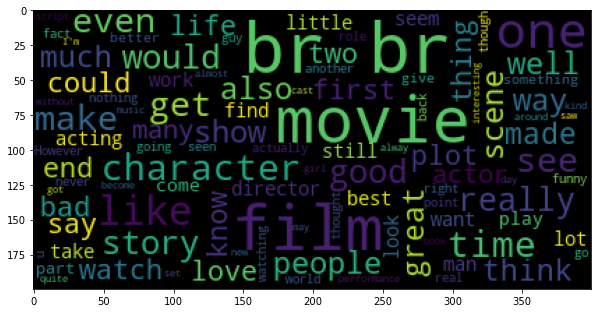

In [16]:
import matplotlib.pyplot as plt 

# Générer et afficher le nuage de mots

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

Il est possible d'afficher le nuage de mots en lui **appliquant un masque**.   
C'est une façon de tracer le nuage de mots en respectant la forme du masque.

La case de code ci-dessous définit la fonction plot_word_cloud qui permet d'afficher un nuage de mots à partir de la chaîne de caractères text passée en paramètre. Elle a également pour paramètre le masque : masque. La couleur par défaut de l'arrière-plan est noire.

- Exécuter la cellule de code ci-dessous, pour voir s'afficher le nuage contenant les mêmes mots que précédement mais qui sont écrit à l'aide du masque iron.jpg

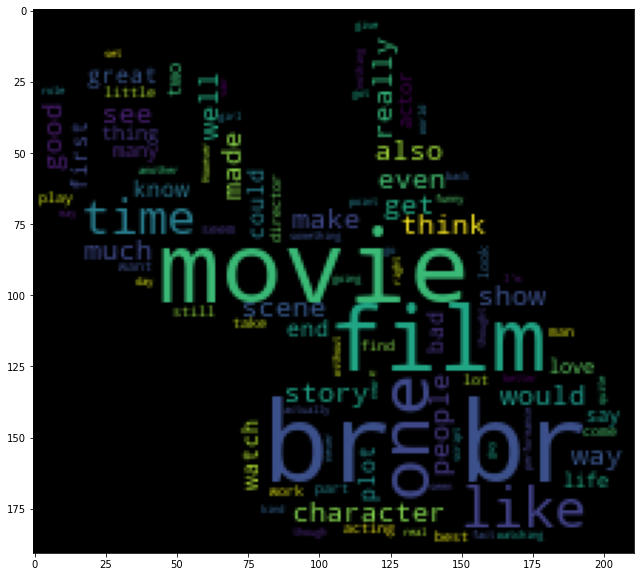

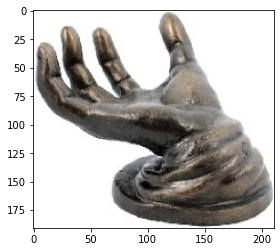

In [18]:
#Importer les packages nécessaires
from PIL import Image
import numpy as np

def plot_word_cloud(text, masque, background_color = "black") :
    # Définir un masque
    mask_coloring = np.array(Image.open(str(masque)))

    # Définir le calque du nuage des mots
    wc = WordCloud(background_color=background_color, max_words=200, stopwords=stop_words, mask = mask_coloring, max_font_size=50, random_state=42)

    # Générer et afficher le nuage de mots
    plt.figure(figsize= (20,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()

plot_word_cloud(text, "iron.jpg")

# Code d'affichage du masque
import matplotlib.image as mpimg
img = mpimg.imread("iron.jpg")
plt.imshow(img)
plt.show()

Il est évident que le nuage de mots ci-dessus considèrent les noms de films comme les mots clés les plus fréquents.    
Pour pallier ce problème, nous allons ajouter les noms de film à la liste des mots vides, stockées dans la variable : stop_words.

- Ajouter au set stop_words les mots suivants : "mission", "impossible", "harry", "potter", "Da", "Vinci", "Mountain", "Brokeback",  "Brokeback", "Code".
- Séparer le jeu de données df en deux DataFrames : df_pos et df_neg. Le premier contient les commentaires positifs et le deuxième ceux négatifs.
- Afficher les quatre premières lignes de df_pos.

In [20]:
# Mettre à jour la valeur de stop_words
mots_vides = ["mission", "impossible", "harry", "potter", "Da", "Vinci", "Mountain", "Brokeback",  "Brokeback", "Code"]
stop_words.update(mots_vides)

# Séparer df en données positives et négatives
df_pos = df[df.label == 1]
df_neg = df[df.label == 0]

# Afficher les quatre premières lignes de df_pos
df_pos.head(4)

,text,label
3,The most interesting thing about Miryang (Secr...,1
5,"I saw this film on September 1st, 2005 in Indi...",1
7,William Hurt may not be an American matinee id...,1
11,I really enjoyed the detail that went into the...,1


Après avoir mis à jour la valeur de stop_words, nous allons affecter tous les commentaires de df_pos et df_neg dans les variables text_pos et text_neg de type string pour pouvoir tracer le nuage de mots par le biais de la fonction plot_word_cloud.

- Créer les variables : text_pos et text_neg.
- Tracer le nuage de mots des commentaires positifs en utilisant la fonction plot_word_cloud avec le masque coeur.png et une couleur d'arrière-plan blanche.
- Tracer le nuage de mots des commentaires negatifs en utilisant la fonction plot_word_cloud avec le masque : "mal.jpg" et une couleur d'arrière-plan noire.

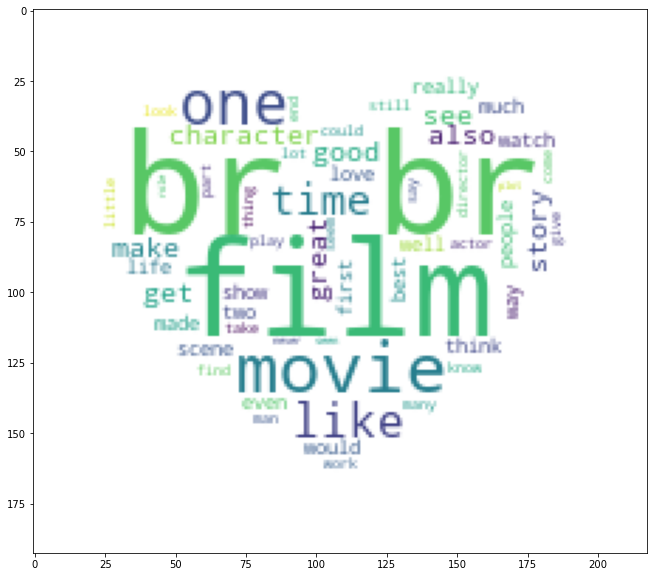

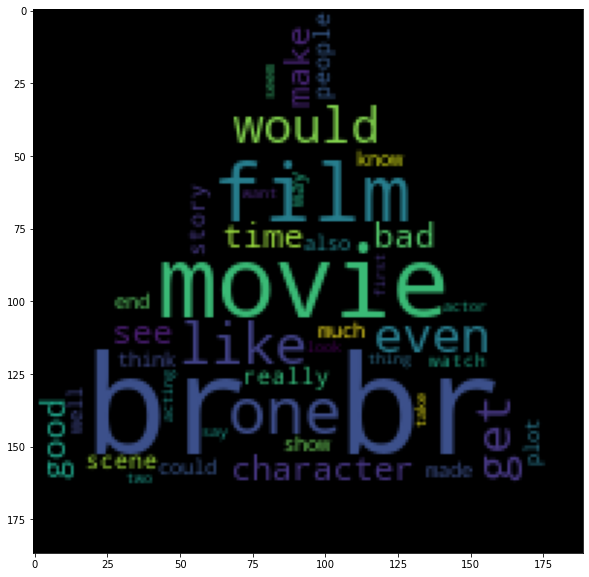

In [21]:
# Définir les données positives et négatives de types string
text_pos = ""
for e in df_pos.text : text_pos += e
text_neg = ""
for e in df_neg.text : text_neg += e

# Tracer le nuage de mots
plot_word_cloud(text_pos, "coeur.png", "white")
plot_word_cloud(text_neg, "mal.jpg")

## Création d'un histogramme
Une autre façon de visualiser les mots les plus fréquemment utilisés par les internautes consiste à créer un histogramme indiquant le nombre de fois où le mot a été utilisé. Intuitivement, la construction de ce diagramme nécessite d'abord de compter le nombre d'occurrences des mots.

La classe Counter du module des collections transforme une liste en un dictionnaire où un élément de la liste (clé) est associé à son nombre d'occurrences.

La méthode .most_common(int) pour un dictionnaire retourne une liste des premiers mots int les plus utilisés avec leur nombre d'occurrences.

La fonction barplot(x,y) du module seaborn permet de construire un histogramme où la paire (x,y) représente respectivement les abscisses et les hauteurs de bâton de l'histogramme.

- Dans une variable nommé chaine, fusionner tous les commentaires négatifs dans une chaine de caractère.
- Créer dico une instance de Counter.
- Grâce à la méthode .most_common(int) afficher l'histogramme des 15 mots les plus fréquents chez les internautes ayant laissé un mauvais commentaire.

Text(0.5, 1.0, '15 mots les plus fréquemment employés par les internautes laissant des mauvais commentaires')

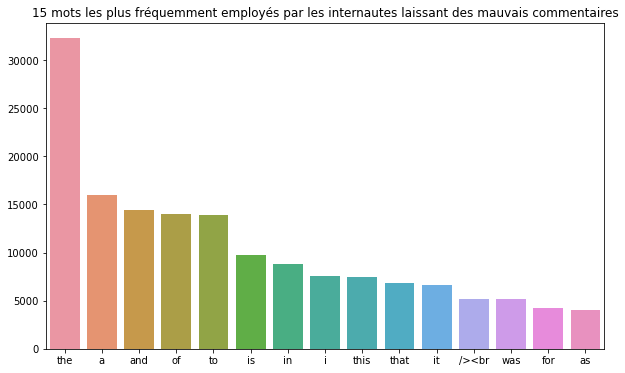

In [23]:
from collections import Counter
import seaborn as sns 
chaine = ' '.join(i.lower() for i in df_neg.text)
dico = Counter(chaine.split())
mots = [m[0] for m in dico.most_common(15)]
freq = [m[1] for m in dico.most_common(15)]

plt.figure(figsize= (10,6))
sns.barplot(x=mots, y=freq)
plt.title('15 mots les plus fréquemment employés par les internautes laissant des mauvais commentaires')

## Code à emporter
Pour reproduire ces notions en situation, la fonction suivante pourra vous être utile.

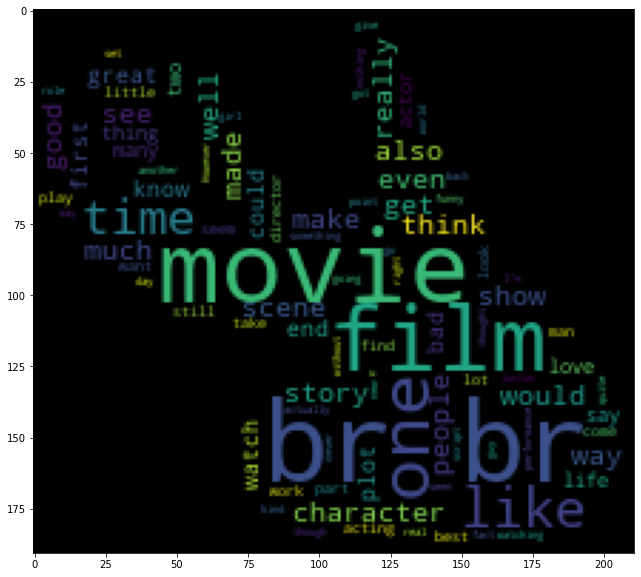

In [25]:
def plot_word_cloud(text, masque, background_color = "black"):
    # Définir un masque
    mask_coloring = np.array(Image.open(str(masque)))
    # Définir le calque du nuage des mots
    wc = WordCloud(background_color=background_color, max_words=200, 
                   stopwords=stop_words, mask = mask_coloring, 
                   max_font_size=50, random_state=42)
    # Générer et afficher le nuage de mots
    plt.figure(figsize= (20,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()

plot_word_cloud(text, "iron.jpg")

# Analyse de sentiments


L'objectif de cet exercice est de construire un modèle simple de Machine Learning pour effectuer une analyse de sentiments après avoir créé un corpus et l'avoir préparé puis transformé en matrice termes-documents.

Le data set movies_comments.csv est utilisé comme jeu d'apprentissage. Il contient 1 371 commentaires en ligne, positifs ou négatifs à propos de films, avec une étiquette binaire correspondant au sentiment général qui se dégage de la phrase : 1 si le commentaire est positif et 0 sinon.

Ce jeu d'entraînement sera utilisé pour construire un modèle de classification complexe permettant de prédire pour n'importe quelle phrase si le sentiment général perçu dans la phrase est positif ou négatif.

L'exercice est composé de plusieurs questions. Vous êtes invités à les faire dans l'ordre ainsi qu'à faire attention à respecter le nom des variables.

- Importer la bibliothèque pandas sous le nom pd.
- Importer la classe CountVectorizer du package sklearn.feature_extraction.text.
- Importer la classe GradientBoostingClassifier du package sklearn.ensemble.
- Affecter le contenu du fichier movies_comments.csv dans un DataFrame appelé df.
- Afficher les deux premières lignes de df.

    - Rappelez-vous qu'avant de regarder la solution, vous avez toujours accès à l'aide officielle de Python en tapant help(nom_fonction) dans la console.

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

df = pd.read_csv('movie_Test.csv')
df.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


La variable explicative (feature en anglais) de chaque commentaire est représentée par l'attribut Text du data set df, alors que la variable à prédire est Sentiment, qui vaut 1 si le commentaire est positif, 0 sinon.

Afin d'évaluer les performances du modèle de classification, il faut isoler une partie des données qui attesteront de la qualité du modèle une fois entraîné.

Pour cela il faut systématiquement diviser les données en un ensemble d'entraînement (X_train et y_train) et un ensemble de test (X_test et y_test).

     - train_test_split est une fonction très utile de Scikit-learn pour la séparation des données. La fonction sépare les matrices de features et de labels passés en paramètre, en un ensemble de d'entraînement et un ensemble test.   
     - Le paramètre test_size permet de choisir dans quelles proportions les données sont réparties.   
       Le paramètre shuffle permet de décider si les échantillons sont choisis aléatoirement (option par défaut), ou bien si la séparation doit se faire en respectant l'ordre des données     indiquées. Ce dernier cas peut correspondre à des cas d'usage où la données traitée admet un ordre ou une dimension temporelle comme un cours financiers, parcours d'un utilisateur sur un site, etc..   
     - Usuellement, la taille de jeu de test est comprise entre 15% et 30% de la quantité totale de données disponibles. Le choix de la répartition dépend essentiellement de la quantité et de la qualité des données disponibles.
     
- Importer la classe train_test_split du package sklearn.model_selection.
- Créer une variable X qui ne contient que la feature Text.
- Stocker la colonne Sentiment dans la variable y.
- Diviser les matrices en un ensemble d'entraînement et un ensemble de test. Précisément, data sera divisé en X_train et X_test et target sera divisé en y_train et y_test, en conservant 20% du dataset pour les ensembles de test.

In [27]:
# Importer la classe train_test 
from sklearn.model_selection import train_test_split

# Séparer la variable explicative de la variable à prédire
X, y = df.text, df.label

# Séparer le jeu de données en données d'entraînement et données test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Gradient Boosting Tree
Le Gradient Boosting Tree est performant en Analyse de sentiments. Par design, cette technique de boosting utilise des arbres de décision comme sous-jacent. L'idée principale est d'agréger plusieurs modèles créés itérativement mais aussi d'accorder un poids différent à chacun d'entre eux.

L'approche suivante explique le raisonnement utilisé dans la conception d'un GBT :

Prendre une pondération aléatoire (poids  wi ) pour les classificateurs faibles (paramètres  ai ) et former un classificateur final.

- Calculer l'erreur induite par ce classificateur final, et chercher le classificateur faible qui s'approche le plus de cette erreur.
- Retrancher ce classificateur faible du classificateur final tout en optimisant son poids par rapport à une fonction de perte.
- Répéter le procédé itérativement.

La procédure de gradient boosting consiste donc à trouver les poids qui optimisent la fonction de coût relative au problème de classification. Il s'agit donc d'explorer un espace de fonctions simples par une descente de gradient.

Pour pouvoir utiliser cet algorithme sous Scikit-learn, il est primordial de convertir les chaînes de caractères de la variable explicative en tokens numériques. Ainsi allons-nous utiliser l'algorithme bag of words.

     - CountVectorizer est une méthode très utile de sklearn.feature_extraction.text pour symboliser des données textuelles en tokens. La fonction sépare le texte en prenant les espaces blancs et la ponctuation comme séparateurs. Ensuite, elle compte les occurrences de tokens dans chaque document.   
     - La méthode fit_transform appliquée à un jeu de données textuelles permet d'entraîner un modèle et renvoie les tokens. La méthode tranform permet d'appliquer la tokenisation aux données textuelles en se basant sur le modèle entraîné auparavant. Et afin de récupérer les tokens numériques, il est possible d'utiliser la méthode todense comme suit : vectorizer.fit_transform(X_train).todense()   
     
- Initialiser un objet vactorisateur, vectorizer, à l'aide de la méthode CountVectorizer.
- Entraîner le vectorisateur sur le jeu de données X_train et mettre à jour sa valeur en lui affectant les tokens numériques correspondants.
- Mettre à jour la valeur de X_test en lui affectant la transformation de X_test en tokens numériques.

In [28]:
# Initialiser un objet vectorizer
vectorizer = CountVectorizer()

# Mettre à jour la valeur de X_train et X_test
X_train = vectorizer.fit_transform(X_train).todense()
X_test = vectorizer.transform(X_test).todense()

Après avoir modéliser le jeu de données movies_comments.csv, il est possible maintenant d'entraîner le modèle de classification.   

Le package sklearn.ensemble implémente l'algorithme Gradient Boosting. La fonction GradientBoostingClassifier permet d'initialiser un classificateur permettant l'application de cet algorithme. Il s'utilise de façon très simple :

- clf = GradientBoostingClassifier() : permet d'initialiser un classificateur clf.
- clf.fit(data, target) : exécute l'algorithme gradient boosting sur le jeu de données en considérant data comme varaible(s) explicative(s) et target comme variable(s) cible(s).
- clf.predict(vars) : effectue la prédiction des variables explicatives.

     - La méthode à plusieurs paramètres :  
Le paramètre n_estimators permet de préciser le nombre d'étapes de boosting. Un grand nombre donne généralement de meilleures performances.  
Le paramètre learning_rate précise la valeur du taux d'apprentissage qui réduit la contribution de chaque arbre et sa profondeur maximale est précisé par le paramètre max_depth.   
Le paramètre random_state permet de préciser la graine utilisée par le générateur de nombres aléatoires.  

- Créer un classificateur clf en utilisant la méthode GradientBoostingClassifier ayant les paramètres suivants :
    - n_estimators = 100.
    - learning_rate = 1.0.
    - max_depth = 1.
    - random_state = 0.
    
- Entraîner le classificateur sur l'ensemble d'entraînement : (X_train, y_train).
- Affecter à la variable y_pred les prédictions des commentaires stockées dans la variable X_test.

In [29]:
# Créer un classificateur clf et entraîner le modèle sur l'ensemble d'entraînement
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

# Calculer les prédictions 
y_pred = clf.predict(X_test)

C:\Users\UserPC\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\UserPC\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


L’évaluation est la clé de la réussite en data science.   
Elle vise à vérifier le(s) modèle(s) ou les connaissances obtenues afin de s’assurer qu’ils répondent aux objectifs formulés au début du processus.   
Elle contribue aussi à la décision de déploiement du modèle ou, si besoin est, à son amélioration.   
A ce stade, on teste notamment la robustesse et la précision des modèles obtenus.

Il existe plusieurs outils servant à mesurer la qualité d'un système de classification, en voici quelques exemples :

La **matrice de confusion** : chaque colonne de la matrice représente le nombre d'occurrences d'une classe estimée, tandis que chaque ligne représente le nombre d'occurrences d'une classe réelle.

Le **rappel** est défini par le nombre de documents pertinents retrouvés au regard du nombre de documents pertinents que possède la base de données.

La **précision** est le nombre de documents pertinents retrouvés rapporté au nombre de documents total proposé par le moteur de recherche pour une requête donnée.

La **F-mesure** est une métrique populaire qui combine la précision et le rappel en calculant leur moyenne harmonique.

Afin d'évaluer les performances du modèle de classification, il faut isoler une partie des données qui attesteront de la qualité du modèle une fois entraîné.

Le Gradient Boosting est une technique d'apprentissage automatique qui va optimiser, selon la fonction de coût appropriée, le choix des poids de différents modèles de classification.   
Ainsi, le gradient boosting est une technique d'ensemble qui généralise le boosting en offrant la possibilité d'introduire d'autres fonctions de coût.   
Il est alors possible de calculer le F-mesure du modèle de classification.

- Importer la classe classification_report du package sklearn.metrics.
- Afficher le rapport de la classification du modèle Gradient Boosting .
- Calculer et afficher la matrice de confusion en prenant en compte les classes estimées y_pred et réelles y_test.

In [30]:
#  Importer la classe classification_report
from sklearn.metrics import classification_report

# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred) )

# Calcul et affichage de la matrice de confusion
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
confusion_matrix

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       479
           1       0.81      0.79      0.80       521

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



Classe prédite,0,1
Classe réelle,,
0,380,99
1,108,413


Ce modèle présente d'excellentes performances ( PAS ICI SUR MON DATASET ) sur les métriques de précision et de rappel. Il prouve donc sa capacité d'apprentissage.  
Notez que la matrice de confusion est quasi-diagonale vu qu'elle contienne que de bonnes classifications sur la colonne.

Cela s'explique en partie par la faculté du Gradient Boosting Tree de pouvoir construire des arbres itérativement. Chaque nouvel arbre permet de corriger les erreurs d'un arbre préalablement formé. Avec chaque arbre ajouté, le modèle devient de plus en plus expressif.

Les résultats de tests de performances ont montré que le Gradient Boosting Tree est meilleur que les Random Forest au niveau apprentissage. Toutefois, il faut toujours analyser avec précision les résultats et veiller à ce que le Gradient Boosting Tree ne sur-apprend pas le jeu de données (overfitting).

Dans le prochain exercice, le modèle va être mis à l'épreuve de commentaires que vous allez écrire.

- Dans une liste comments compiler les commentaires (en anglais) de type string dont vous souhaitez connaitre le sentiment.
- Dans la variable tokenized_comment, transformez les commentaires en tokens à l'aide de vectorizer et de la méthode transform.

     - Selon la version de sklearn le classifier clf n'accepte pas les matrices sparses, ce qui sera probablement le cas de votre matrice de tokenizée commentaires. Il faut alors utiliser la méthode toarray sans paramètres pour que la matrice soit compatible.
     
- Prédire et afficher les sentiments.

In [32]:
comments = ["Harry Potter 7 part I is an amazing movie even it is not adapted for children.", 
            "I left after 45 min because this movie was boring !"]

tokenized_comments = vectorizer.transform(comments)

clf.predict(tokenized_comments.toarray())

array([1, 0], dtype=int64)